In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/heartdisease/heart.csv")
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
df['ExerciseAngina'].value_counts()

,count
ExerciseAngina,
N,547
Y,371


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

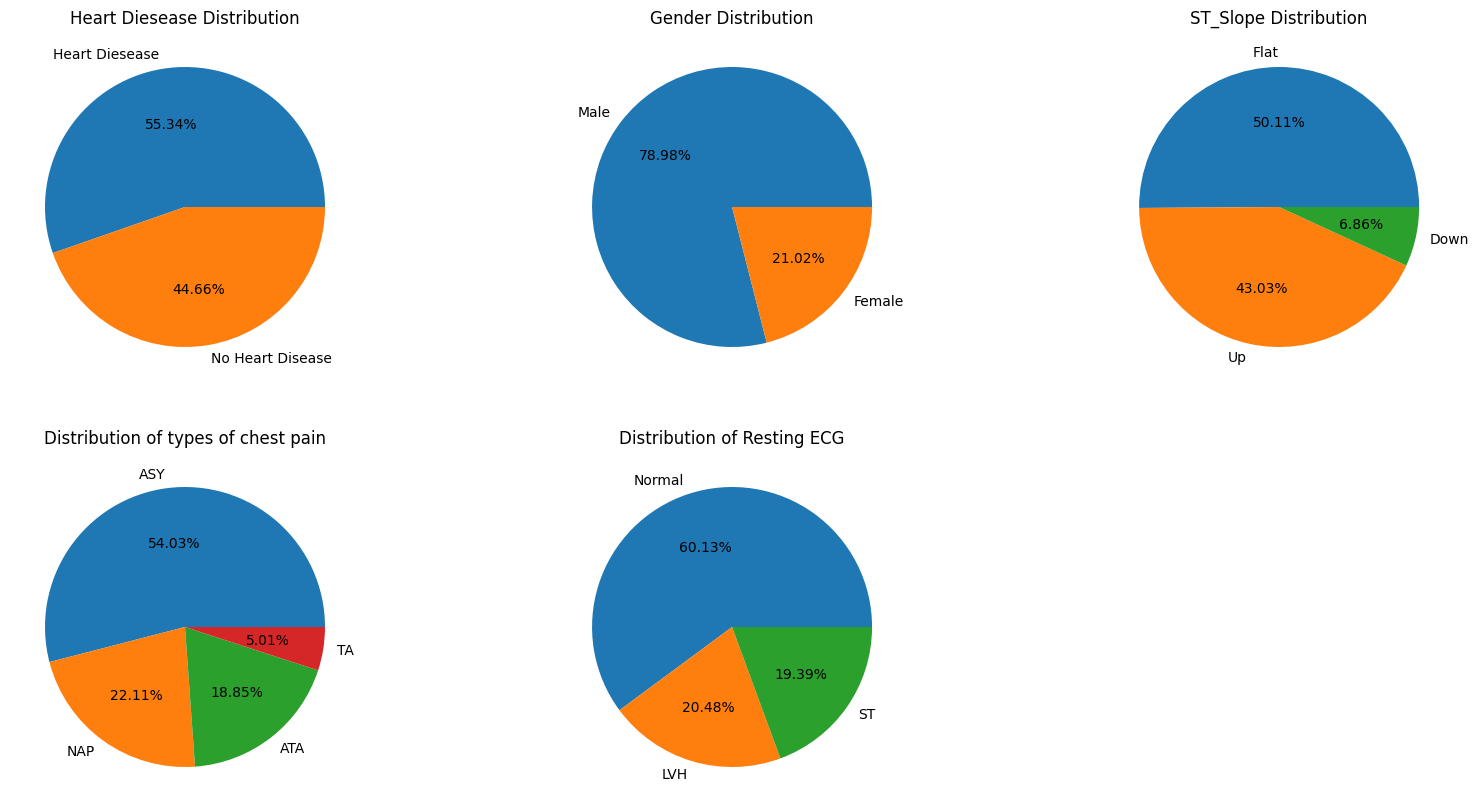

In [ ]:
tdf=df['HeartDisease'].value_counts().reset_index()
tdf1=df['Sex'].value_counts().reset_index()
tdf2=df['ChestPainType'].value_counts().reset_index()
tdf3=df['RestingECG'].value_counts().reset_index()
tdf4=df['ST_Slope'].value_counts().reset_index()
fig,axes=plt.subplots(2,3,figsize=(20,10))
axes[0][0].pie(x=tdf['count'],labels=['Heart Diesease','No Heart Disease'],autopct='%.2f%%')
axes[0][0].set_title("Heart Diesease Distribution")
axes[0][1].pie(x=tdf1['count'],labels=['Male','Female'],autopct='%.2f%%')
axes[0][1].set_title("Gender Distribution")
axes[0][2].pie(x=tdf4['count'],labels=tdf4['ST_Slope'],autopct='%.2f%%')
axes[0][2].set_title("ST_Slope Distribution")
axes[1][0].pie(x=tdf2['count'],labels=tdf2['ChestPainType'],autopct='%.2f%%')
axes[1][0].set_title("Distribution of types of chest pain")
axes[1][1].pie(x=tdf3['count'],labels=tdf3['RestingECG'],autopct='%.2f%%')
axes[1][1].set_title("Distribution of Resting ECG")
axes[1][2].set_visible(False)
plt.show()

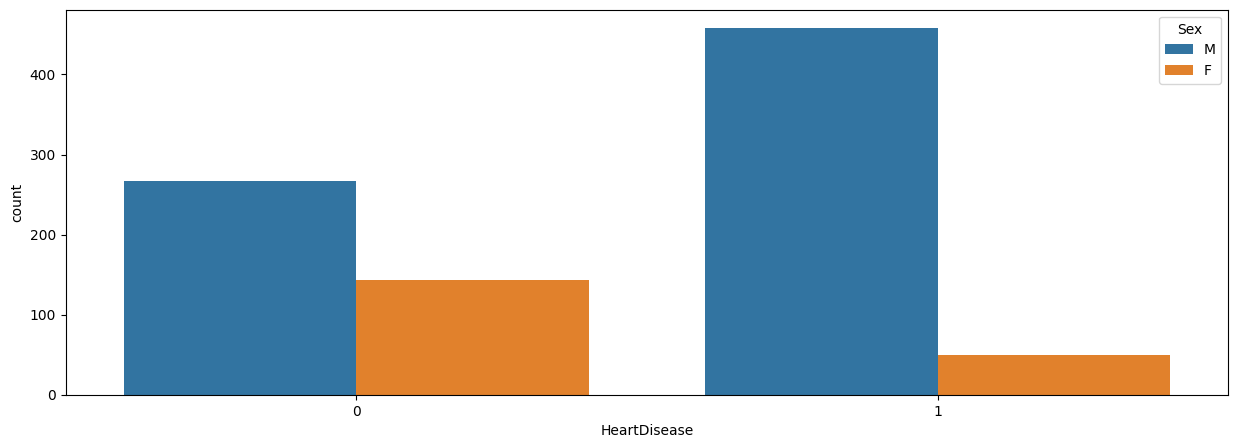

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(data=df,x='HeartDisease',hue='Sex')
plt.show()

<ipython-input-11-c20882568cee>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=categories, y=proportions, palette='magma')


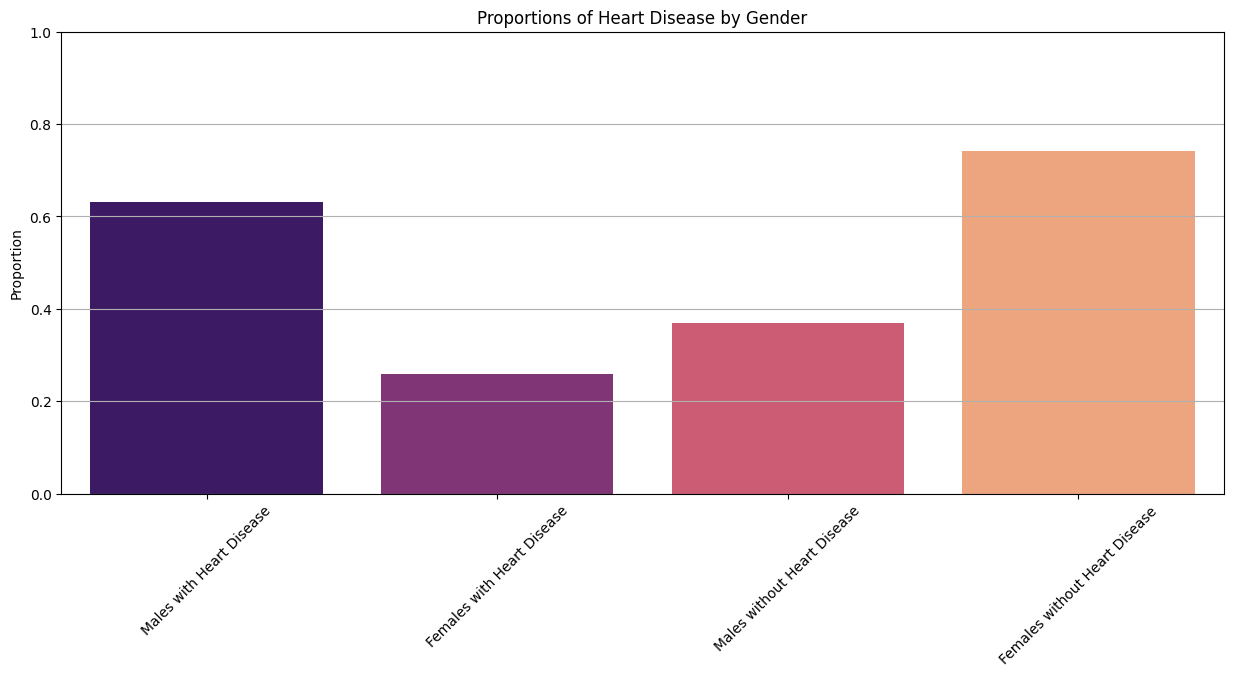

In [ ]:
c=df.loc[(df['HeartDisease']==1)&(df['Sex']=='M')].shape[0]
c1=df.loc[(df['HeartDisease']==1)&(df['Sex']=='F')].shape[0]
c2=df.loc[(df['HeartDisease']==0)&(df['Sex']=='M')].shape[0]
c3=df.loc[(df['HeartDisease']==0)&(df['Sex']=='F')].shape[0]
total_counts = df['Sex'].value_counts()
proportions = [
    c/total_counts['M'],
    c1/total_counts['F'],
    c2/total_counts['M'],
    c3/total_counts['F']
]
categories = [
    'Males with Heart Disease',
    'Females with Heart Disease',
    'Males without Heart Disease',
    'Females without Heart Disease'
]
plt.figure(figsize=(15, 6))
sns.barplot(x=categories, y=proportions, palette='magma')
plt.title('Proportions of Heart Disease by Gender')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.grid(axis='y')
plt.show()


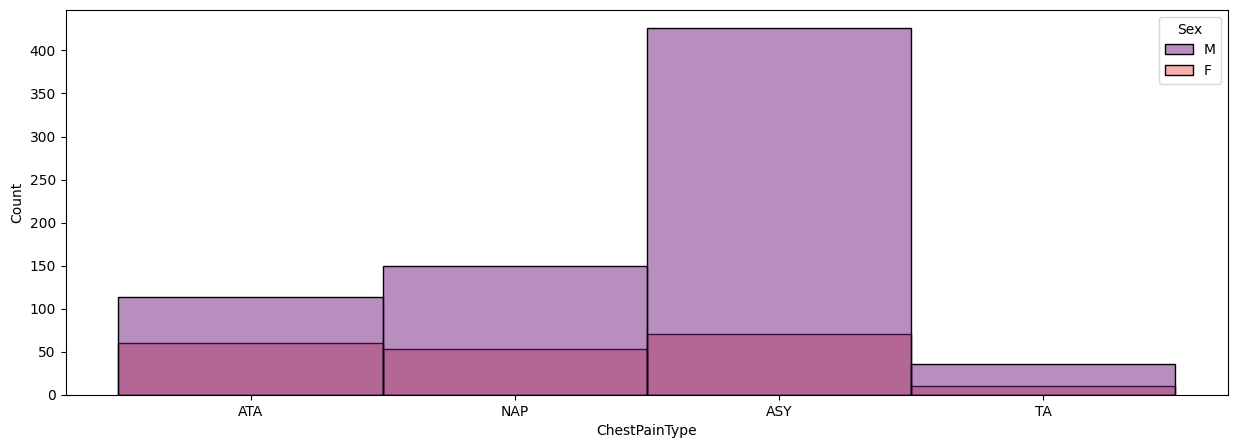

In [ ]:
plt.figure(figsize=(15,5))
sns.histplot(data=df,x='ChestPainType',hue='Sex',palette='magma')
plt.show()

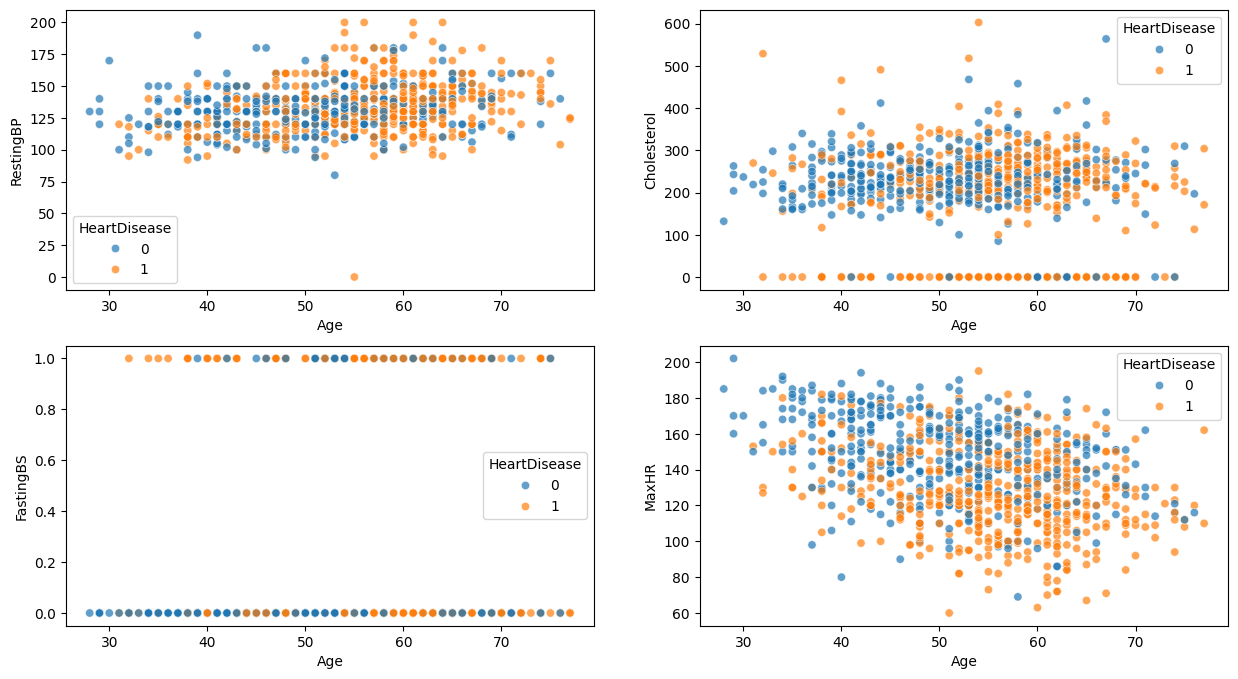

In [ ]:
fig,axes=plt.subplots(2,2,figsize=(15,8))
sns.scatterplot(data=df,x='Age',y='RestingBP',ax=axes[0][0],hue='HeartDisease',alpha=0.7)
sns.scatterplot(data=df,x='Age',y='Cholesterol',ax=axes[0][1],hue='HeartDisease',alpha=0.7)
sns.scatterplot(data=df,x='Age',y='FastingBS',ax=axes[1][0],hue='HeartDisease',alpha=0.7)
sns.scatterplot(data=df,x='Age',y='MaxHR',ax=axes[1][1],hue='HeartDisease',alpha=0.7)
plt.show()

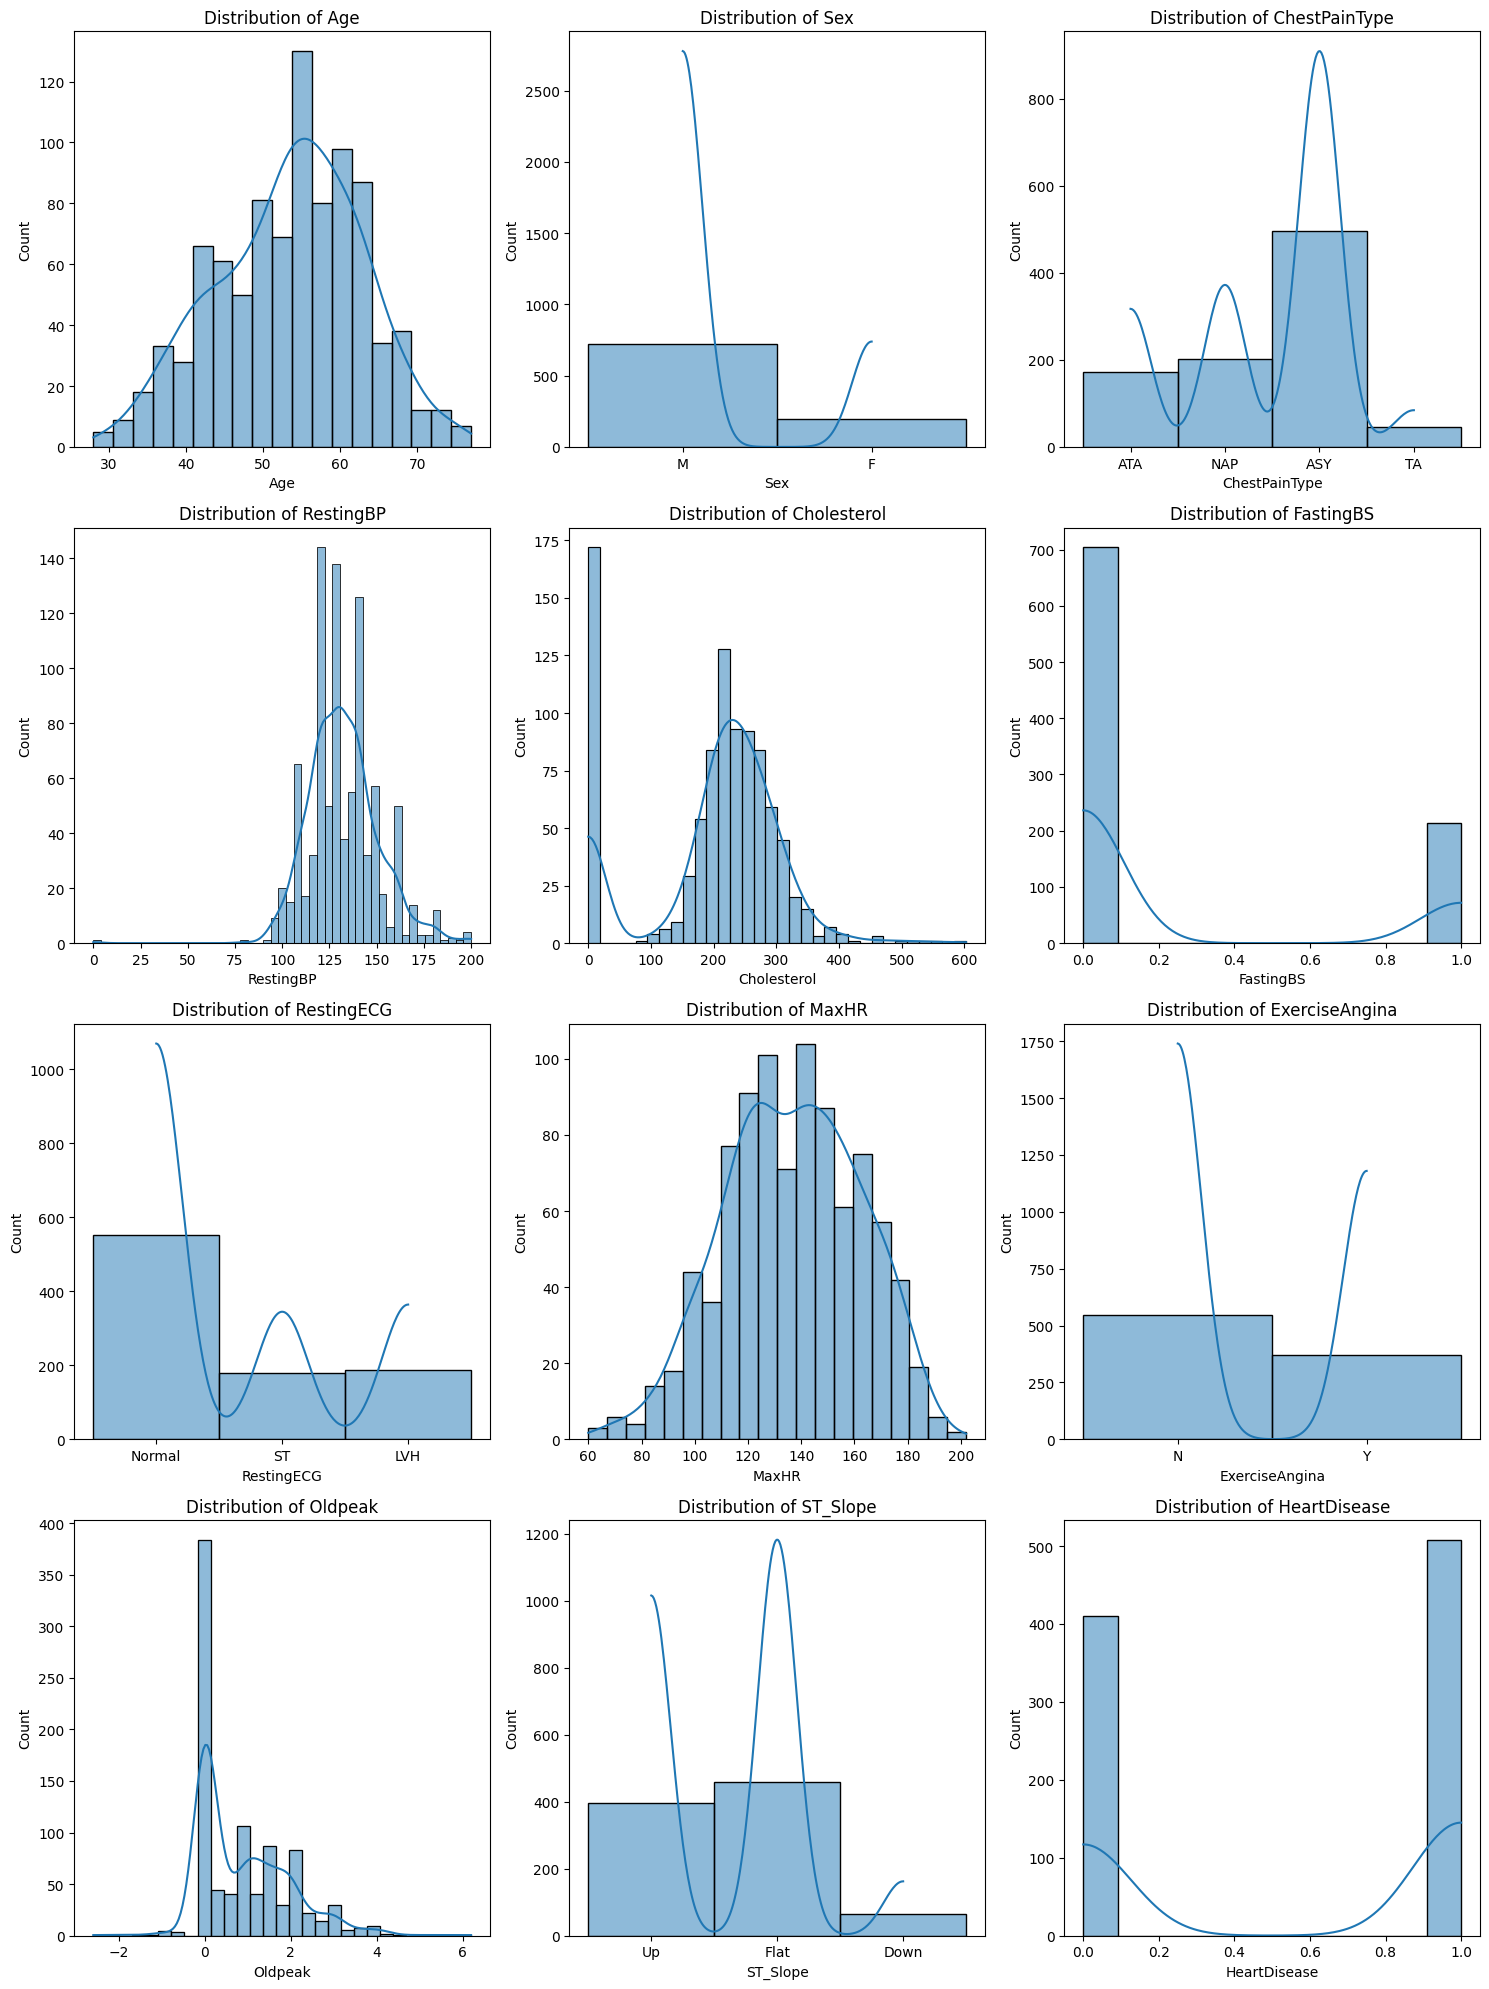

In [ ]:
plt.figure(figsize=(15,20))
for i,col in enumerate(df.columns,1):
    plt.subplot(4,3,i)
    plt.title(f"Distribution of {col}")
    sns.histplot(df[col],kde=True)
    plt.tight_layout()
    plt.plot()

<ipython-input-15-2f41fc75e545>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['HeartDisease'], y=col, data=df, palette="Set2")
<ipython-input-15-2f41fc75e545>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['HeartDisease'], y=col, data=df, palette="Set2")
<ipython-input-15-2f41fc75e545>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['HeartDisease'], y=col, data=df, palette="Set2")
<ipython-input-15-2f41fc75e545>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. As

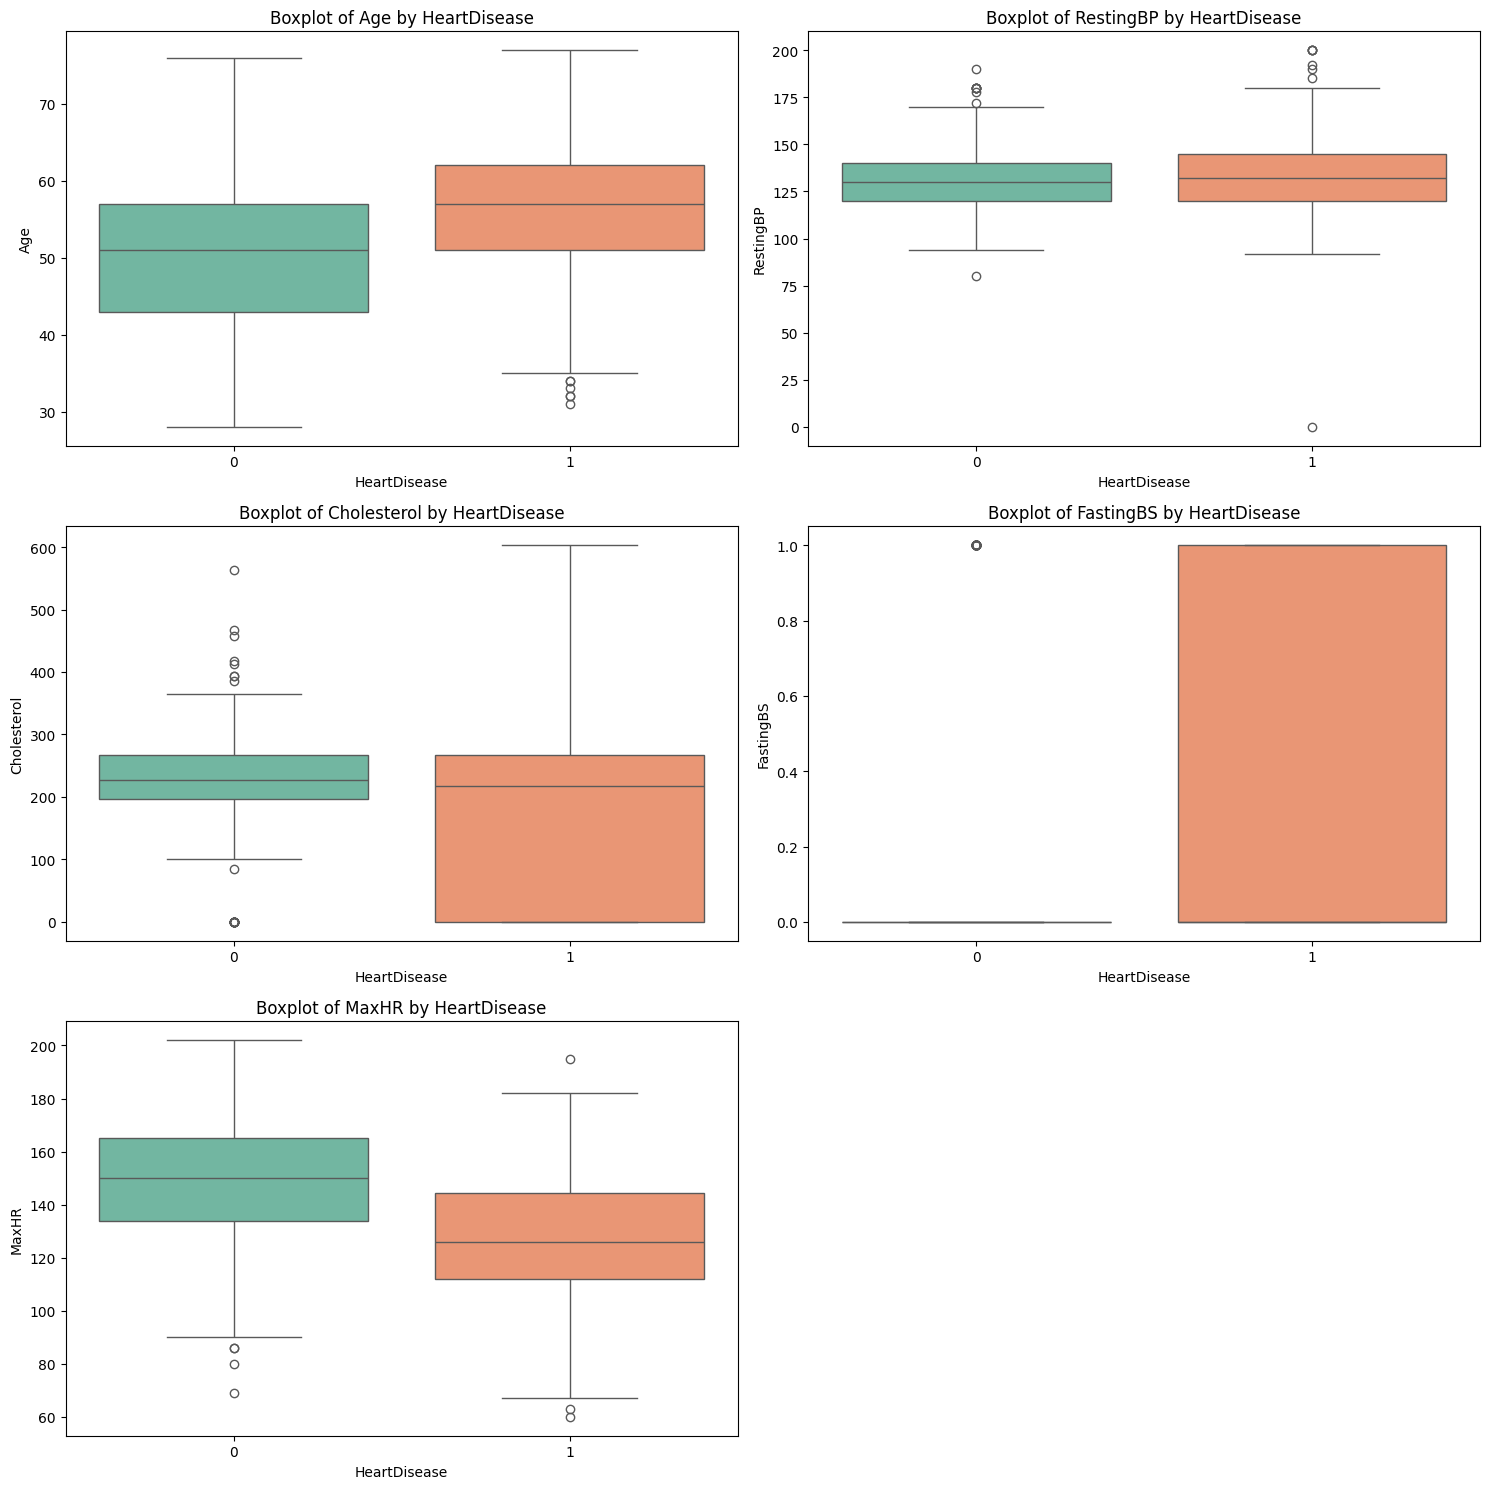

In [ ]:
plt.figure(figsize=(15,15))

for i, col in enumerate(df.columns[df.dtypes=='int64'].drop('HeartDisease'), 1):
    plt.subplot(3, 2, i)
    plt.title(f"Boxplot of {col} by HeartDisease")
    sns.boxplot(x=df['HeartDisease'], y=col, data=df, palette="Set2")
    plt.tight_layout()

plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder #I will be using Tree based classification algos so not using One Hot Encoding
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
df.isnull().any()

,0
Age,False
Sex,False
ChestPainType,False
RestingBP,False
Cholesterol,False
FastingBS,False
RestingECG,False
MaxHR,False
ExerciseAngina,False
Oldpeak,False


In [ ]:
le=LabelEncoder()
for col in df.columns[df.dtypes=='object']:
    df[col]=le.fit_transform(df[col])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    int64  
 2   ChestPainType   918 non-null    int64  
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    int64  
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    int64  
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    int64  
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 86.2 KB


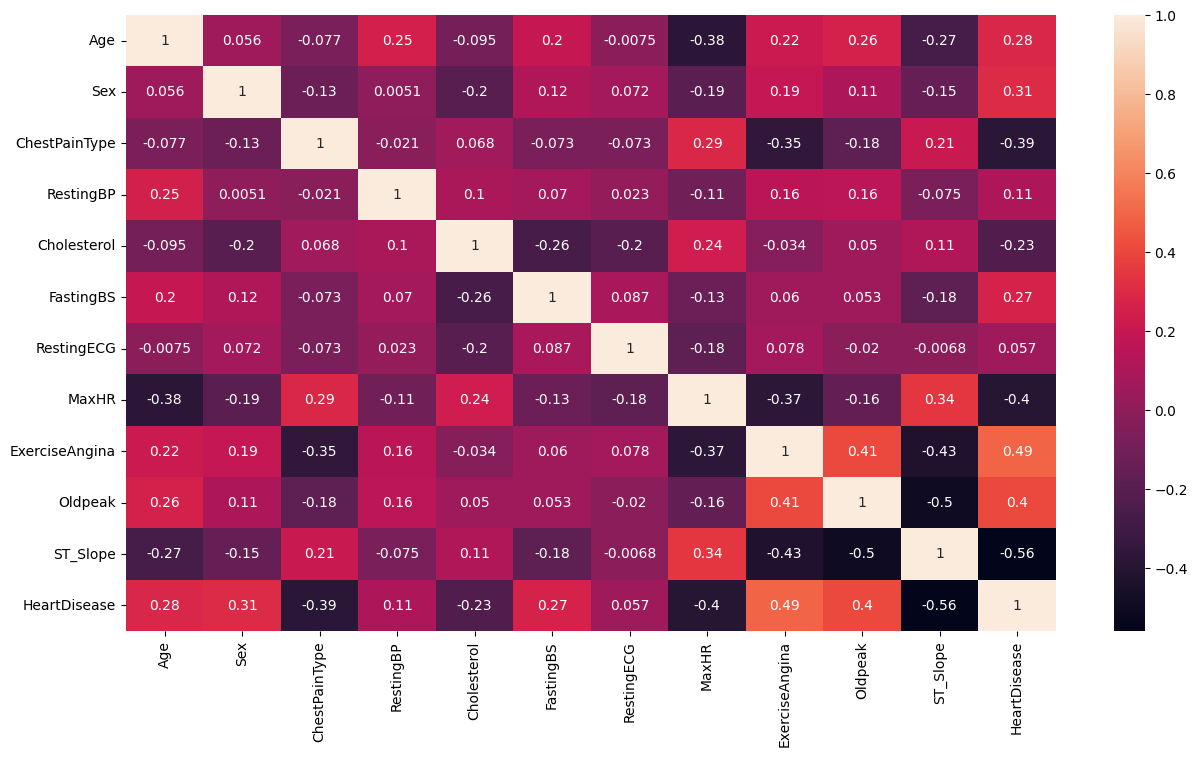

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [ ]:
x=df.drop(columns='HeartDisease')
y=df['HeartDisease']
mi=mutual_info_classif(x,y)
mi_df=pd.DataFrame({'Feature':x.columns,'MI Score': mi})
mi_df=mi_df.sort_values(by='MI Score', ascending=False)
mi_df

,Feature,MI Score
10,ST_Slope,0.216253
2,ChestPainType,0.147926
8,ExerciseAngina,0.133257
9,Oldpeak,0.120129
7,MaxHR,0.087850
0,Age,0.073586
4,Cholesterol,0.068751
5,FastingBS,0.044317
1,Sex,0.039780
3,RestingBP,0.030601


In [ ]:
x_t,x_te,y_t,y_te=train_test_split(x,y,test_size=0.25,random_state=20)

In [ ]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,classification_report

In [ ]:
dt=DecisionTreeClassifier()
path=dt.cost_complexity_pruning_path(x_t,y_t)
alphas=path.ccp_alphas
params={'ccp_alpha':alphas}
ndt=RandomizedSearchCV(dt,param_distributions=params,cv=10,n_jobs=-1,scoring='accuracy')
ndt.fit(x_t,y_t)
print(ndt.best_params_)
print(ndt.best_score_)
ba=ndt.best_params_['ccp_alpha']

{'ccp_alpha': 0.003488372093023256}
0.8488064791133845


In [ ]:
dt=DecisionTreeClassifier(ccp_alpha=ba)
params={'criterion':['gini','entropy'],'min_samples_split':list(np.arange(2,41)),'min_samples_leaf':list(np.arange(2,41)),
       'max_features':['sqrt','log2',None],'max_depth':list(np.arange(1,31))}
ndt=RandomizedSearchCV(dt,param_distributions=params,cv=10,n_jobs=-1,scoring='accuracy')
ndt.fit(x_t,y_t)
print(ndt.best_params_)
print(ndt.best_score_)
ndt=ndt.best_estimator_
pred_t=ndt.predict(x_t)
pred=ndt.predict(x_te)

{'min_samples_split': 5, 'min_samples_leaf': 6, 'max_features': None, 'max_depth': 27, 'criterion': 'entropy'}
0.8182225063938618


In [ ]:
rf=RandomForestClassifier()
params={'criterion':['gini','entropy'],'min_samples_split':list(np.arange(2,101)),'min_samples_leaf':list(np.arange(2,101)),
       'max_depth':list(np.arange(1,51)),'n_estimators':[1000]}
nrf=RandomizedSearchCV(rf,param_distributions=params,cv=10,n_jobs=-1,scoring='accuracy')
nrf.fit(x_t,y_t)
print(nrf.best_params_)
print(nrf.best_score_)
nrf=nrf.best_estimator_

{'n_estimators': 1000, 'min_samples_split': 20, 'min_samples_leaf': 3, 'max_depth': 24, 'criterion': 'gini'}
0.8691815856777494


In [ ]:
pred1_t=nrf.predict(x_t)
pred1=nrf.predict(x_te)

In [ ]:
ada=AdaBoostClassifier(algorithm='SAMME')
params={
    'n_estimators': [50, 100, 500, 1000],
    'learning_rate': np.arange(0.01, 2.01, 0.01),}

nada=RandomizedSearchCV(ada,param_distributions=params,cv=10,n_jobs=-1,scoring='accuracy')
nada.fit(x_t ,y_t)
print(nada.best_params_)
print(nada.best_score_)
nada=nada.best_estimator_


{'n_estimators': 100, 'learning_rate': 0.61}
0.8632992327365729


In [ ]:
pred2_t=nada.predict(x_t)
pred2=nada.predict(x_te)

In [ ]:
tdf=pd.DataFrame({'Classification Algorithms':['Decsion Tree Classifier','Random Forest Classifier','AdaBoostClassifier'],
                  'Training Accuracy':[accuracy_score(y_t,pred_t),accuracy_score(y_t,pred1_t),accuracy_score(y_t,pred2_t)],
                  'Training Precision':[precision_score(y_t,pred_t),precision_score(y_t,pred1_t),precision_score(y_t,pred2_t)],
                  'Training Recall':[recall_score(y_t,pred_t),recall_score(y_t,pred1_t),recall_score(y_t,pred2_t)],
                  'Training F1 Score':[f1_score(y_t,pred_t),f1_score(y_t,pred1_t),f1_score(y_t,pred2_t)]})
tdf

,Classification Algorithms,Training Accuracy,Training Precision,Training Recall,Training F1 Score
0,Decsion Tree Classifier,0.902616,0.920844,0.904145,0.912418
1,Random Forest Classifier,0.906977,0.898515,0.940415,0.918987
2,AdaBoostClassifier,0.876453,0.881013,0.901554,0.891165


In [ ]:
tedf=pd.DataFrame({'Classification Algorithms':['Decsion Tree Classifier','Random Forest Classifier','AdaBoostClassifier'],
                  'Testing Accuracy':[accuracy_score(y_te,pred),accuracy_score(y_te,pred1),accuracy_score(y_te,pred2)],
                  'Testing Precision':[precision_score(y_te,pred),precision_score(y_te,pred1),precision_score(y_te,pred2)],
                  'Testing Recall':[recall_score(y_te,pred),recall_score(y_te,pred1),recall_score(y_te,pred2)],
                  'Testing F1 Score':[f1_score(y_te,pred),f1_score(y_te,pred1),f1_score(y_te,pred2)]})
tedf

,Classification Algorithms,Testing Accuracy,Testing Precision,Testing Recall,Testing F1 Score
0,Decsion Tree Classifier,0.830435,0.798561,0.909836,0.850575
1,Random Forest Classifier,0.856522,0.834586,0.909836,0.870588
2,AdaBoostClassifier,0.869565,0.859375,0.901639,0.880000


In [ ]:
print('Decison Tree Classifier\n\n')
print(classification_report(y_te,pred))
print('\n\n\nRandom Forest Classifier\n\n')
print(classification_report(y_te,pred1))
print('\n\n\nAdaBoost Classifier\n\n')
print(classification_report(y_te,pred2))

Decison Tree Classifier


              precision    recall  f1-score   support

           0       0.88      0.74      0.80       108
           1       0.80      0.91      0.85       122

    accuracy                           0.83       230
   macro avg       0.84      0.83      0.83       230
weighted avg       0.84      0.83      0.83       230




Random Forest Classifier


              precision    recall  f1-score   support

           0       0.89      0.80      0.84       108
           1       0.83      0.91      0.87       122

    accuracy                           0.86       230
   macro avg       0.86      0.85      0.85       230
weighted avg       0.86      0.86      0.86       230




AdaBoost Classifier


              precision    recall  f1-score   support

           0       0.88      0.83      0.86       108
           1       0.86      0.90      0.88       122

    accuracy                           0.87       230
   macro avg       0.87      0.87      0.87    

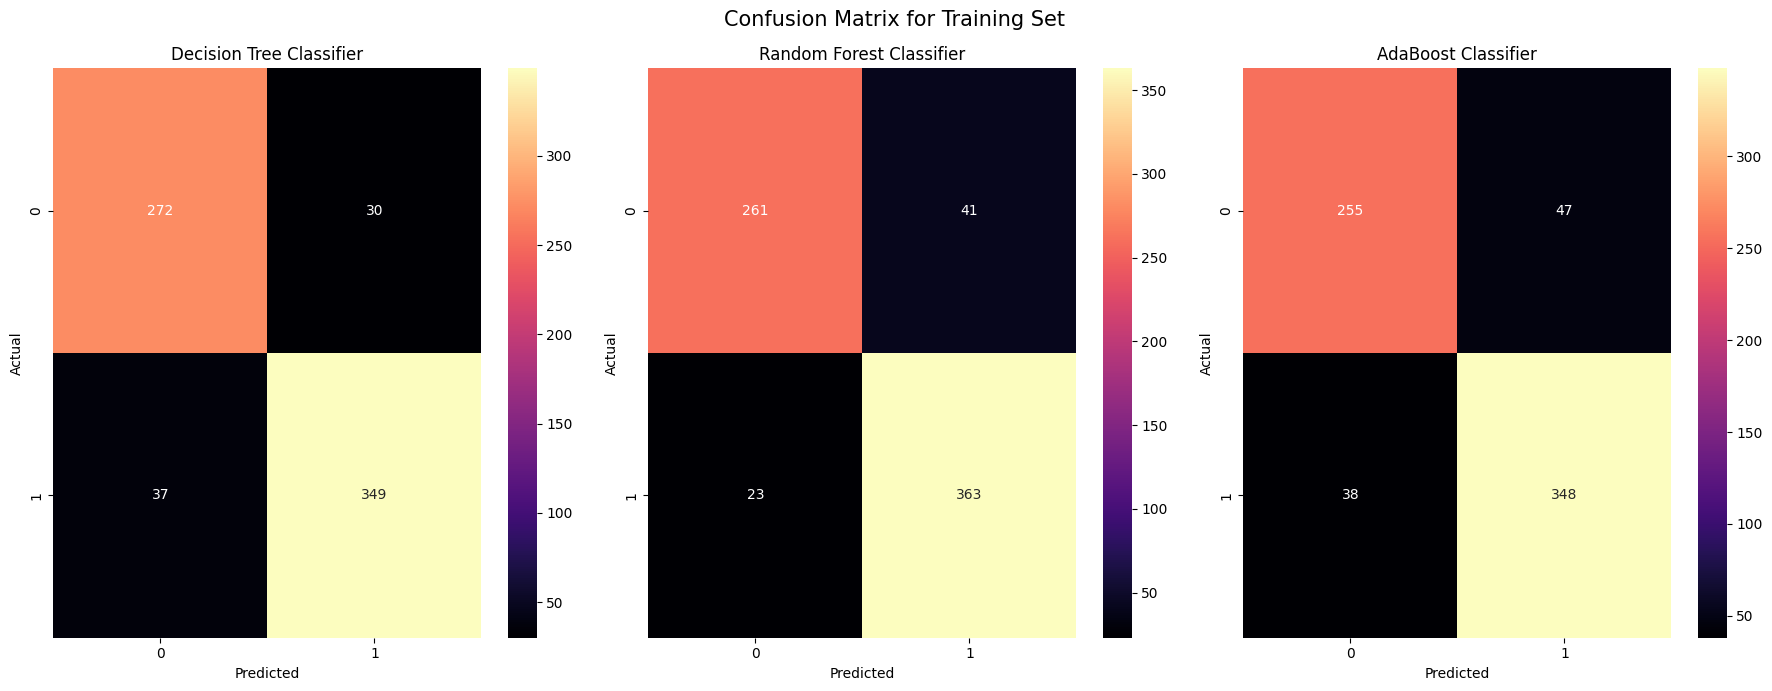

In [ ]:
cm_tree=confusion_matrix(y_t,pred_t)
cm_rf=confusion_matrix(y_t,pred1_t)
cm_adaboost=confusion_matrix(y_t,pred2_t)
fig, axes=plt.subplots(1, 3, figsize=(18, 7))

sns.heatmap(cm_tree,annot=True,fmt='d',cmap='magma',ax=axes[0])
axes[0].set_title('Decision Tree Classifier')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')
sns.heatmap(cm_rf, annot=True,fmt='d',cmap='magma',ax=axes[1])
axes[1].set_title('Random Forest Classifier')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')
sns.heatmap(cm_adaboost,annot=True,fmt='d',cmap='magma',ax=axes[2])
axes[2].set_title('AdaBoost Classifier')
axes[2].set_xlabel('Predicted')
axes[2].set_ylabel('Actual')
plt.suptitle('Confusion Matrix for Training Set',fontsize=15)
plt.tight_layout()
plt.show()

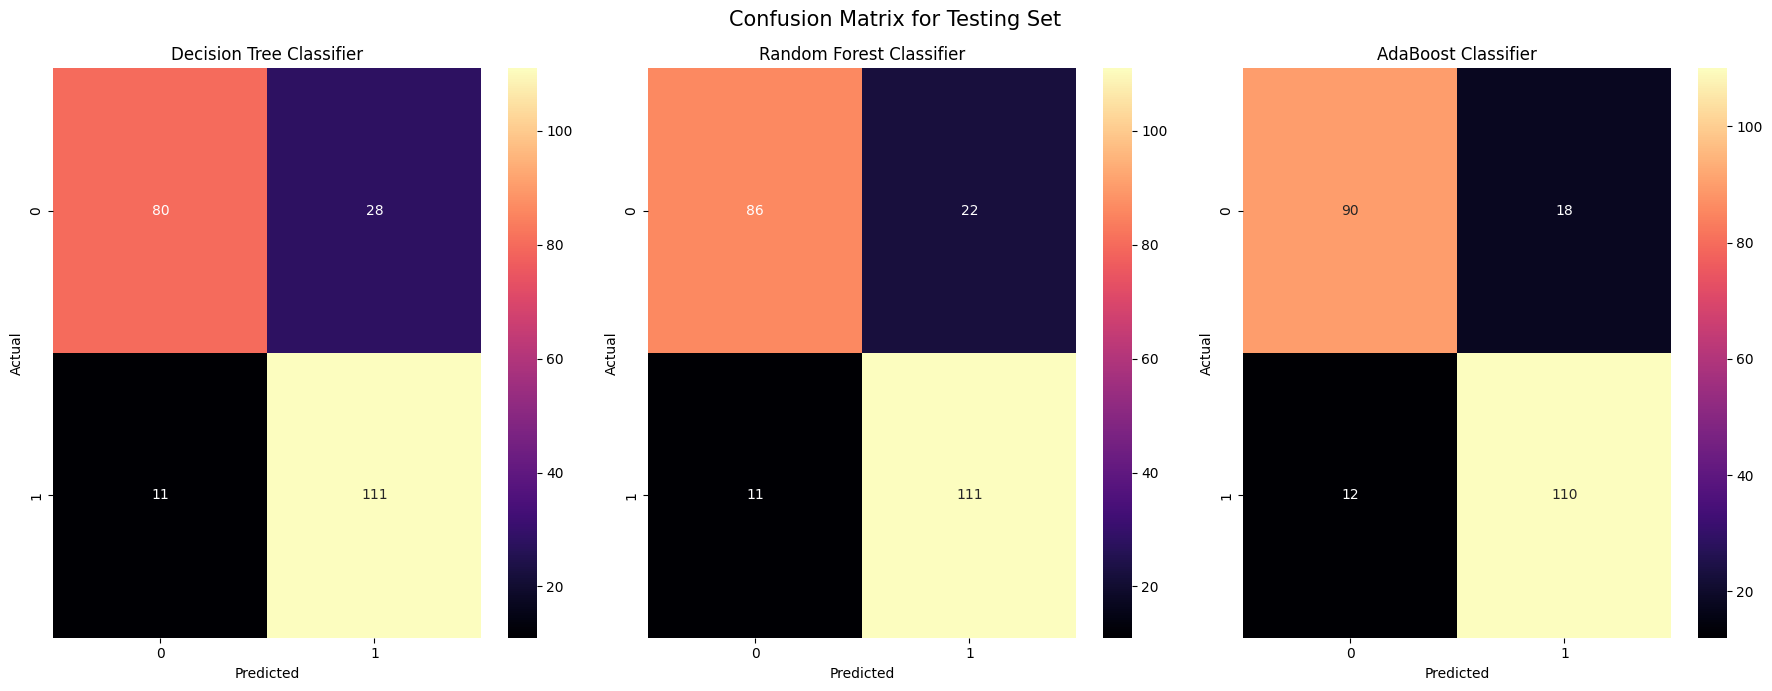

In [ ]:
cm_tree=confusion_matrix(y_te,pred)
cm_rf=confusion_matrix(y_te,pred1)
cm_adaboost=confusion_matrix(y_te,pred2)
fig, axes=plt.subplots(1, 3, figsize=(18, 7))

sns.heatmap(cm_tree,annot=True,fmt='d',cmap='magma',ax=axes[0])
axes[0].set_title('Decision Tree Classifier')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')
sns.heatmap(cm_rf, annot=True,fmt='d',cmap='magma',ax=axes[1])
axes[1].set_title('Random Forest Classifier')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')
sns.heatmap(cm_adaboost,annot=True,fmt='d',cmap='magma',ax=axes[2])
axes[2].set_title('AdaBoost Classifier')
axes[2].set_xlabel('Predicted')
axes[2].set_ylabel('Actual')
plt.suptitle('Confusion Matrix for Testing Set',fontsize=15)
plt.tight_layout()
plt.show()